# 5.1 PCA
一般に、特徴抽出は計算効率を改善するために使用されるが、特に正則化されていないモデルを扱う場合などに「次元の呪い」を減らすのにも役立つ。

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from modules import *
%matplotlib inline

In [2]:
df_wine, X_train, X_test, y_train, y_test = get_wine_data()
df_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045


In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
cov_mat = np.cov(X_train_std, rowvar=False)
eigen_vals, eigen_vecs = np.linalg.eigh(cov_mat)
#eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
eigen_vals
eigen_vecs

array([[ -5.54687162e-02,  -2.75660860e-01,  -4.03567189e-01,
          4.13320786e-04,  -4.17197583e-01,   4.03054922e-01,
          1.79263662e-01,  -1.48851318e-01,   1.87815947e-01,
         -2.06254611e-01,   1.17235150e-01,   5.04170789e-01,
         -1.46698114e-01],
       [  3.32731614e-02,   8.13845005e-02,   1.52474999e-01,
         -8.78560762e-02,   2.17101488e-01,   1.01833706e-01,
          5.92636731e-01,  -2.69052764e-01,  -5.68639776e-01,
         -1.30489298e-01,  -1.49946576e-01,   2.42168894e-01,
          2.42245536e-01],
       [ -1.00618575e-01,   1.29751275e-02,  -1.68376064e-01,
         -4.52518598e-01,   1.28549846e-01,  -3.51841423e-01,
         -6.07334578e-02,  -9.33386061e-02,   2.99209426e-01,
         -1.51536318e-02,  -6.56394387e-01,   2.86984836e-01,
          2.99344215e-02],
       [  5.61658566e-02,  -9.89088030e-02,   6.70902926e-02,
          4.86169765e-01,   4.73344124e-02,   5.00457282e-01,
         -2.50323869e-01,  -1.01342392e-01,   4.124

In [5]:
pd.DataFrame(X_train_std).cov()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.008130,0.087977,0.230670,-0.328681,0.214163,0.355768,0.299125,-0.169137,0.096491,0.569623,-0.047815,0.074035,0.632779
1,0.087977,1.008130,0.201642,0.306581,-0.060309,-0.301242,-0.412212,0.366166,-0.191901,0.307492,-0.549928,-0.393528,-0.202539
2,0.230670,0.201642,1.008130,0.449720,0.183214,0.122355,0.061303,0.186557,-0.026078,0.245554,-0.109280,-0.018200,0.159480
3,-0.328681,0.306581,0.449720,1.008130,-0.089310,-0.370184,-0.418045,0.402121,-0.257657,-0.030902,-0.253133,-0.289344,-0.485043
4,0.214163,-0.060309,0.183214,-0.089310,1.008130,0.165133,0.144587,-0.307636,0.272286,0.126067,0.057926,0.015961,0.314611
5,0.355768,-0.301242,0.122355,-0.370184,0.165133,1.008130,0.881200,-0.453969,0.619681,-0.069351,0.457188,0.722145,0.563268
6,0.299125,-0.412212,0.061303,-0.418045,0.144587,0.881200,1.008130,-0.583300,0.665990,-0.191837,0.583319,0.802058,0.557594
7,-0.169137,0.366166,0.186557,0.402121,-0.307636,-0.453969,-0.583300,1.008130,-0.353940,0.154513,-0.317822,-0.493793,-0.364566
8,0.096491,-0.191901,-0.026078,-0.257657,0.272286,0.619681,0.665990,-0.353940,1.008130,-0.070181,0.322822,0.510366,0.355521
9,0.569623,0.307492,0.245554,-0.030902,0.126067,-0.069351,-0.191837,0.154513,-0.070181,1.008130,-0.523954,-0.451658,0.316055


In [6]:
pd.DataFrame(cov_mat)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.008130,0.087977,0.230670,-0.328681,0.214163,0.355768,0.299125,-0.169137,0.096491,0.569623,-0.047815,0.074035,0.632779
1,0.087977,1.008130,0.201642,0.306581,-0.060309,-0.301242,-0.412212,0.366166,-0.191901,0.307492,-0.549928,-0.393528,-0.202539
2,0.230670,0.201642,1.008130,0.449720,0.183214,0.122355,0.061303,0.186557,-0.026078,0.245554,-0.109280,-0.018200,0.159480
3,-0.328681,0.306581,0.449720,1.008130,-0.089310,-0.370184,-0.418045,0.402121,-0.257657,-0.030902,-0.253133,-0.289344,-0.485043
4,0.214163,-0.060309,0.183214,-0.089310,1.008130,0.165133,0.144587,-0.307636,0.272286,0.126067,0.057926,0.015961,0.314611
5,0.355768,-0.301242,0.122355,-0.370184,0.165133,1.008130,0.881200,-0.453969,0.619681,-0.069351,0.457188,0.722145,0.563268
6,0.299125,-0.412212,0.061303,-0.418045,0.144587,0.881200,1.008130,-0.583300,0.665990,-0.191837,0.583319,0.802058,0.557594
7,-0.169137,0.366166,0.186557,0.402121,-0.307636,-0.453969,-0.583300,1.008130,-0.353940,0.154513,-0.317822,-0.493793,-0.364566
8,0.096491,-0.191901,-0.026078,-0.257657,0.272286,0.619681,0.665990,-0.353940,1.008130,-0.070181,0.322822,0.510366,0.355521
9,0.569623,0.307492,0.245554,-0.030902,0.126067,-0.069351,-0.191837,0.154513,-0.070181,1.008130,-0.523954,-0.451658,0.316055


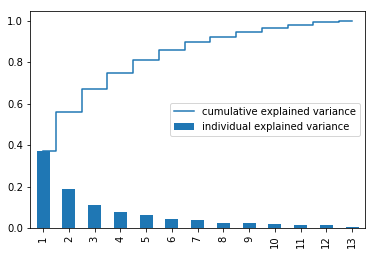

In [7]:
var_exp = pd.DataFrame(eigen_vals)/pd.DataFrame(eigen_vals).sum()
var_exp = var_exp.sort_values(0, ascending=False)
var_exp = pd.concat([var_exp, var_exp.cumsum()], axis=1)
var_exp.columns = ['individual explained variance', 'cumulative explained variance']
var_exp.index = range(1, len(var_exp)+1)
#var_exp['cumulative explained variance'].plot(drawstyle="steps-post") # なぜかずれる...
plt.step(range(len(var_exp)),var_exp['cumulative explained variance'],where='mid')
var_exp['individual explained variance'].plot(kind='bar')
plt.legend()
plt.show()

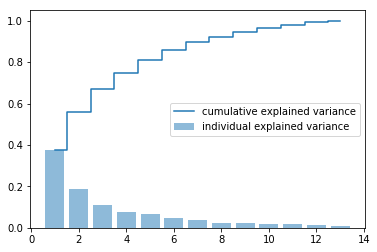

In [8]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.legend()
plt.show()

In [9]:
eigen_pairs = [(eigen_vals[i], eigen_vecs[:,i]) for i in range(len(eigen_vals))] # 分散共分散行列は半正定値だからnp.abs()は必要ない
eigen_pairs.sort(reverse=True)
eigen_pairs

[(4.8923083032737367,
  array([-0.14669811,  0.24224554,  0.02993442,  0.25519002, -0.12079772,
         -0.38934455, -0.42326486,  0.30634956, -0.30572219,  0.09869191,
         -0.30032535, -0.36821154, -0.29259713])),
 (2.4663503157592239,
  array([ 0.50417079,  0.24216889,  0.28698484, -0.06468718,  0.22995385,
          0.09363991,  0.01088622,  0.01870216,  0.03040352,  0.54527081,
         -0.27924322, -0.174365  ,  0.36315461])),
 (1.4280997275048468,
  array([ 0.11723515, -0.14994658, -0.65639439, -0.58428234, -0.08226275,
         -0.18080442, -0.14295933, -0.17223475, -0.1583621 ,  0.14242171,
         -0.09323872, -0.19607741,  0.09731711])),
 (1.012334620904495,
  array([-0.20625461, -0.1304893 , -0.01515363,  0.09042209,  0.83912835,
         -0.19317948, -0.14045955, -0.33733262,  0.1147529 , -0.07878571,
         -0.02417403, -0.18402864, -0.05676778])),
 (0.8490645933450246,
  array([ 0.18781595, -0.56863978,  0.29920943,  0.04124995,  0.02719713,
         -0.14064543,

In [10]:
eigen_pairs[0][1][:, np.newaxis]

array([[-0.14669811],
       [ 0.24224554],
       [ 0.02993442],
       [ 0.25519002],
       [-0.12079772],
       [-0.38934455],
       [-0.42326486],
       [ 0.30634956],
       [-0.30572219],
       [ 0.09869191],
       [-0.30032535],
       [-0.36821154],
       [-0.29259713]])

In [11]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
#w = np.vstack((eigen_pairs[0][1], eigen_pairs[1][1])).T
w

array([[-0.14669811,  0.50417079],
       [ 0.24224554,  0.24216889],
       [ 0.02993442,  0.28698484],
       [ 0.25519002, -0.06468718],
       [-0.12079772,  0.22995385],
       [-0.38934455,  0.09363991],
       [-0.42326486,  0.01088622],
       [ 0.30634956,  0.01870216],
       [-0.30572219,  0.03040352],
       [ 0.09869191,  0.54527081],
       [-0.30032535, -0.27924322],
       [-0.36821154, -0.174365  ],
       [-0.29259713,  0.36315461]])

In [12]:
print("Shape of X_train_std:", X_train_std.shape)
print("Shape of w:", w.shape)
X_train_pca = X_train_std.dot(w)
print("Shape of X_train_pca:", X_train_pca.shape)
X_train_pca

Shape of X_train_std: (124, 13)
Shape of w: (13, 2)
Shape of X_train_pca: (124, 2)


array([[-2.59891628,  0.00484089],
       [-0.15819134, -2.26659577],
       [ 2.6372337 ,  2.66488569],
       [ 2.52848449,  0.51846618],
       [-1.70922581, -0.91719459],
       [ 2.83057003,  0.41936129],
       [ 2.82251879,  1.99763147],
       [-1.36618015,  0.04639099],
       [ 2.46584868, -0.07932269],
       [ 2.28554906, -0.40096658],
       [-1.14246632, -2.39587633],
       [ 2.28497881, -1.09274988],
       [ 2.52924945,  0.6477328 ],
       [-0.169245  , -1.1264982 ],
       [-2.53088166,  1.05798498],
       [ 0.71596964, -2.80365836],
       [-2.46922033, -0.15871191],
       [ 0.58044574, -0.69290749],
       [-0.54583852,  0.41042188],
       [-3.5604963 ,  1.42561284],
       [-1.58679826, -1.51260121],
       [-2.54872139, -0.05280515],
       [ 3.59338727,  0.88321901],
       [ 1.60406659,  2.40373662],
       [-1.48668426, -1.40863724],
       [-0.00830468, -2.04898307],
       [ 0.15646658, -2.80278355],
       [ 2.39863877,  2.47524175],
       [ 3.13549157,

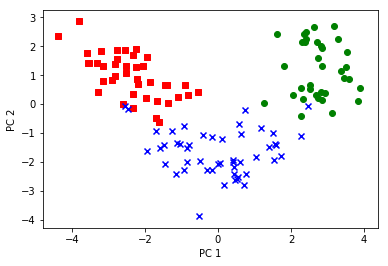

In [13]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[np.array(y_train==l), 0], X_train_pca[np.array(y_train==l), 1], c=c, label=l, marker=m)
    #plt.scatter(X_train_pca[(y_train==l), 0], X_train_pca[(y_train==l), 1], c=c, label=l, marker=m)
    # error occur. pay attention to handling of boolean array 
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

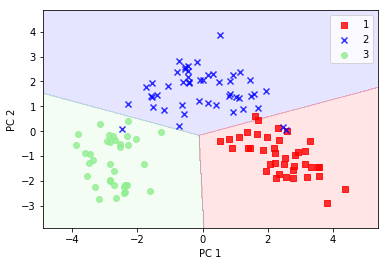

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()

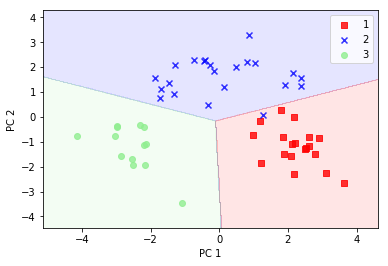

In [15]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()

In [16]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([ 0.37329648,  0.18818926,  0.10896791,  0.07724389,  0.06478595,
        0.04592014,  0.03986936,  0.02521914,  0.02258181,  0.01830924,
        0.01635336,  0.01284271,  0.00642076])

# 5.2 Linear Discriminant Analysis : LDA
PCAがクラスラベルを利用しない（教師無し）であるのに対し、LDAはクラスラベルを利用する（教師有り）。LDAはデータが正規分布に従っていることを前提とする。また、クラスの共分散行列が同じであること、特徴量が独立であることも前提とする。ただし、多少満たしてなくてもそれなりにうまくいくらしい。

In [17]:
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(1,4):
    mean_vecs.append(np.mean(X_train_std[np.array(y_train==label)], axis=0))
    print('MV %s: %s\n' %(label, mean_vecs[label-1]))

MV 1: [ 0.9259 -0.3091  0.2592 -0.7989  0.3039  0.9608  1.0515 -0.6306  0.5354
  0.2209  0.4855  0.798   1.2017]

MV 2: [-0.8727 -0.3854 -0.4437  0.2481 -0.2409 -0.1059  0.0187 -0.0164  0.1095
 -0.8796  0.4392  0.2776 -0.7016]

MV 3: [ 0.1637  0.8929  0.3249  0.5658 -0.01   -0.9499 -1.228   0.7436 -0.7652
  0.979  -1.1698 -1.3007 -0.3912]



In [18]:
d = 13
S_W = np.zeros((d, d))
for label, mv in zip(range(1,4), mean_vecs):
    class_scatter = np.zeros((d, d))
    for row in X_train_std[np.array(y_train == label)]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)
        class_scatter += (row-mv).dot((row-mv).T)
    S_W += class_scatter
print('Within-class scatter matrix:\n', S_W)

Within-class scatter matrix:
 [[  51.451     0.6703   -2.0626   -3.4724    4.8439    9.0902    5.6869
    -2.4125    1.1081   18.6567    1.6244   -1.1247    5.5666]
 [   0.6703   84.9931    9.4747   14.8345   -7.8987    2.5139    1.0304
    13.6919    8.9987   -6.6558  -16.7846    7.3565  -11.0777]
 [  -2.0626    9.4747  107.9726   62.5595   14.2609   13.5861   11.0074
    20.6729    2.3228   -2.3424    4.3746   10.3117   -3.6481]
 [  -3.4724   14.8345   62.5595   84.2488    1.8515    5.27      6.2734
    14.7829   -0.7605   -5.4354    2.205    12.2967   -4.9821]
 [   4.8439   -7.8987   14.2609    1.8515  117.4596    7.0513    4.7957
   -30.1086   28.0092    2.7801    6.0001   -4.9141   15.6729]
 [   9.0902    2.5139   13.5861    5.27      7.0513   54.9426   27.2458
    -6.9652   30.7719   10.9644    0.9629   16.3488    6.4507]
 [   5.6869    1.0304   11.0074    6.2734    4.7957   27.2458   26.9773
   -13.2474   26.4092    9.9972    0.6481    8.9281    1.8698]
 [  -2.4125   13.6919   2

In [19]:
print('Class label distribution:', np.bincount(y_train)[1:])

Class label distribution: [40 49 35]


In [20]:
# need to scaling
d = 13
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 4), mean_vecs):
    class_scatter = np.cov(X_train_std[np.array(y_train==label)], rowvar=False)
    S_W += class_scatter
print('Scaled within-class scatter matrix:\n', S_W)

Scaled within-class scatter matrix:
 [[  1.2458e+00   5.1385e-02  -3.2946e-02  -8.9533e-02   1.1546e-01
    2.4539e-01   1.5011e-01  -5.5687e-02   9.9079e-02   4.8786e-01
    2.3763e-02  -6.9716e-03   1.3421e-01]
 [  5.1385e-02   2.1547e+00   2.2434e-01   3.5434e-01  -1.9660e-01
    3.6054e-02  -5.4027e-03   3.4017e-01   1.6840e-01  -1.6748e-01
   -3.5755e-01   1.7728e-01  -2.5417e-01]
 [ -3.2946e-02   2.2434e-01   2.5250e+00   1.4581e+00   3.7029e-01
    3.3665e-01   2.3874e-01   4.7135e-01   3.0912e-02  -5.6416e-02
    1.2842e-01   2.3408e-01  -1.0665e-01]
 [ -8.9533e-02   3.5434e-01   1.4581e+00   1.9805e+00   8.1397e-02
    1.1795e-01   1.2522e-01   3.2764e-01  -3.7325e-02  -1.2945e-01
    6.1622e-02   2.5545e-01  -1.2909e-01]
 [  1.1546e-01  -1.9660e-01   3.7029e-01   8.1397e-02   2.7048e+00
    1.6042e-01   1.4980e-01  -7.3692e-01   5.9847e-01   7.6183e-02
    1.1849e-01  -1.1342e-01   3.1797e-01]
 [  2.4539e-01   3.6054e-02   3.3665e-01   1.1795e-01   1.6042e-01
    1.2976e+00  

In [21]:
mean_overall = np.mean(X_train_std, axis=0)
d = 13
S_B = np.zeros((d, d))
for i, mv in enumerate(mean_vecs):
    n = X_train[np.array(y_train==i+1)].shape[0]
    mv = mv.reshape(d, 1)
    mean_overall = mean_overall.reshape(d, 1)
    S_B += n * (mv - mean_overall).dot((mv - mean_overall).T)
print('Between-class scatter matrix:\n', S_B)

Between-class scatter matrix:
 [[ 72.549   10.1509  30.4349 -36.9554  21.4982  34.6692  31.1055 -18.3914
   10.7602  51.4069  -7.5057  10.231   72.2652]
 [ 10.1509  39.0069  15.3272  22.8751   0.4806 -39.5667 -51.7325  31.3465
  -32.6026  44.4773 -50.8565 -55.7604 -13.8346]
 [ 30.4349  15.3272  16.0274  -7.244    8.2744   1.4636  -3.4672   2.2736
   -5.5304  32.5455 -17.8161 -12.5503  23.2642]
 [-36.9554  22.8751  -7.244   39.7512 -12.8366 -50.8027 -57.6929  34.678
  -30.9313   1.6344 -33.3403 -47.886  -54.6782]
 [ 21.4982   0.4806   8.2744 -12.8366   6.5404  13.26    12.9885  -7.7306
    5.482   12.7262   1.1248   6.8773  23.0242]
 [ 34.6692 -39.5667   1.4636 -50.8027  13.26    69.0574  81.1418 -48.873
   45.4488 -19.4945  55.2712  72.475   62.8312]
 [ 31.1055 -51.7325  -3.4672 -57.6929  12.9885  81.1418  97.0227 -58.4985
   55.5076 -33.5931  71.1001  89.7251  66.7143]
 [-18.3914  31.3465   2.2736  34.678   -7.7306 -48.873  -58.4985  35.2729
  -33.5083  20.6153 -43.0446 -54.206  -39.9

In [22]:
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))
#eigen_vals, eigen_vecs = np.linalg.eigh(np.linalg.inv(S_W).dot(S_B))
# S_W^-1 S_Bは半正定値とは限らない?
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)
for eigen_val in eigen_pairs:
    print(eigen_val[0])

452.721581245
156.43636122
3.71473586636e-14
3.52296525769e-14
3.52296525769e-14
2.84217094304e-14
2.75387591384e-14
1.74998442826e-14
1.74998442826e-14
9.94212693972e-15
9.94212693972e-15
6.4862232967e-15
1.27249920527e-15


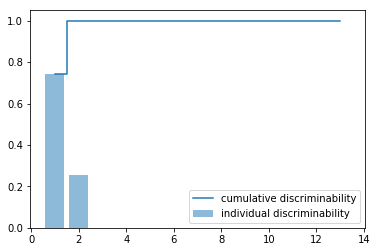

In [23]:
tot = sum (eigen_vals.real)

discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)
plt.bar(range(1,14), discr, alpha=0.5, align='center', label='individual discriminability')
plt.step(range(1,14), cum_discr, where='mid', label='cumulative discriminability')
plt.legend()
plt.show()

In [24]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real, eigen_pairs[1][1][:, np.newaxis].real))
w

array([[-0.0662, -0.3797],
       [ 0.0386, -0.2206],
       [-0.0217, -0.3816],
       [ 0.184 ,  0.3018],
       [-0.0034,  0.0141],
       [ 0.2326,  0.0234],
       [-0.7747,  0.1869],
       [-0.0811,  0.0696],
       [ 0.0875,  0.1796],
       [ 0.185 , -0.284 ],
       [-0.066 ,  0.2349],
       [-0.3805,  0.073 ],
       [-0.3285, -0.5971]])

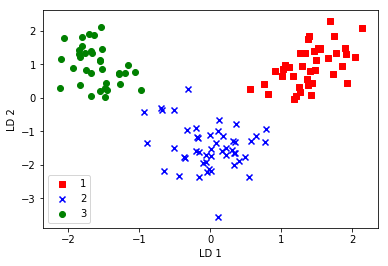

In [26]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[np.array(y_train==l), 0] * (-1), X_train_lda[np.array(y_train==l), 1] * (-1), c=c, label=l, marker=m)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend()
plt.show()

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

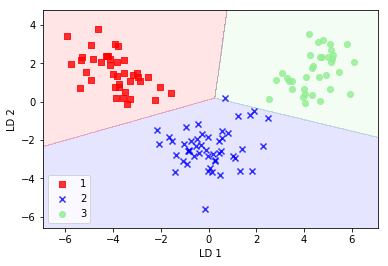

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend()
plt.show()

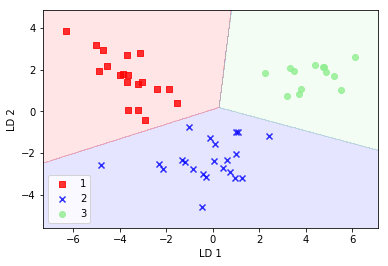

In [32]:
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier=lr)
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend()
plt.show()

# 5.3 Kernel PCA
線形に分離できないデータを変換し、線形分類器に適した新しい低次元の部分空間へ射影する。